# **Customer Insights for Marketing Campaign:**

Segment customers from a Superstore based on various attributes such as  demographics and purchasing behavior.
Provide insights to help a marketing team craft personalized strategies to increase sales and customer reactivation.

**Dataset:** This dataset contains detailed information for over 2000 customers of a superstore. It includes information such as demographics, purchasing behavior, and responses to various marketing campaigns.

**Tools & Framework:**
ProgrammingLanguage: Python
Libraries: pandas, numpy, scikit-learn, matplotlib, seaborn

Skills: (1) Data collection, (2) Exploratory data analysis (EDA), (3) Data cleaning, (4) Descriptive Statistics (5) Data Preprocessing, (6) Data visualization, (7) Machine Learning (8) Evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# 1. Data Collection
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('Data/superstore_data.csv')

Mounted at /content/drive


In [ ]:
# 2. Exploratory Data Analysis (EDA)
# Checking the first few rows
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Shape of Dataset
print(f"The dataset has {df.shape[0]} rows ans {df.shape[1]} columns.")

The dataset has 2240 rows ans 22 columns.


In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Null Values
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# 3. Data Cleaning
# Missing Values
df.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>The <strong style='color: green;'>'Income' column</strong> is the only one that has null values, and the type of <strong style='color: green;'>'Dt_Customer' column</strong> should be of type Date, not Object.</p>

In [ ]:
# 4. Descriptive Statistics
df.describe().transpose()      #df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Some columns have discrepants values, such as the <strong style='color: green;'>'Income' Column'</strong> and columns representing the amount spent on certain type of products, like <strong style='color: green;'>'MntMeatProducts'</strong> and <strong style='color: green;'>'MntWines' columns</strong>.</p>
<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>These atipical values can disrupt our model.</p>

In [ ]:
# 5. Data Preprocessing
# replacing the type of 'Dt_Customer' column.

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer).dt.to_period('M')

In [ ]:
df.Dt_Customer.sort_values()

,Dt_Customer
2239,2012-01
738,2012-01
1375,2012-01
1398,2012-01
1435,2012-01
...,...
504,2014-12
479,2014-12
478,2014-12
950,2014-12


In [ ]:
# checking the null values of 'Income' column

df[df.Income.isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,2012-11,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,2013-11,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2014-02,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2013-02,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,2013-11,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,2013-01,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,2014-05,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-12,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,2013-05,52,375,...,94,66,96,7,4,10,4,3,0,0


In [ ]:
# assigning the median to null values of 'Income' column

df.loc[df.Income.isnull(), 'Income'] = np.nanmedian(df.Income)

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Now we can make insights to check for outliers.</p>

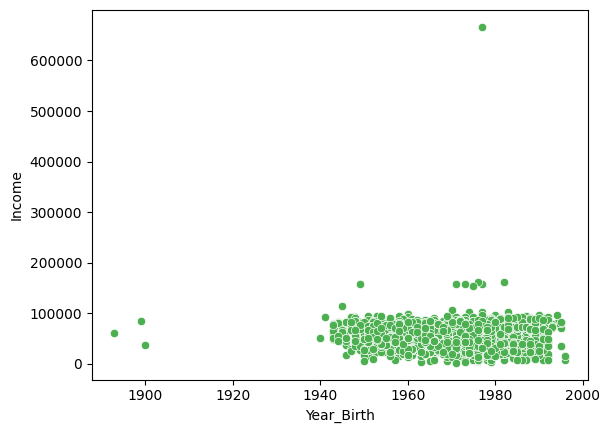

In [ ]:
# 6. Data Visualization for Outlier Detection

fig, ax = plt.subplots()
sns.scatterplot(df, x='Year_Birth', y='Income', ax=ax, color='#4CAF50')
plt.show()

In [ ]:
# Filter Birth Year less than or equal to 1900
df[df.Year_Birth <= 1900]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,2013-09,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09,99,15,...,7,4,25,1,2,1,2,5,0,1


*   There is a big gap between 1900 and 1940 in 'Birth_Year' with only 3 customers born before 1901. These values are outliers with a possibility that a data entry error occurred in these cases
*   There is one value in the 'Income' column that deviates significantly from rest
*   Birth Year and Income columns need to be treated to prevent them from negatively influencing the overall customer insights





In [ ]:
# excluding these samples / Filter outliers out of the dataset

df.drop(df.index[df.Year_Birth <= 1900], inplace=True)
df.drop(df.index[df.Income > 300000], inplace=True)

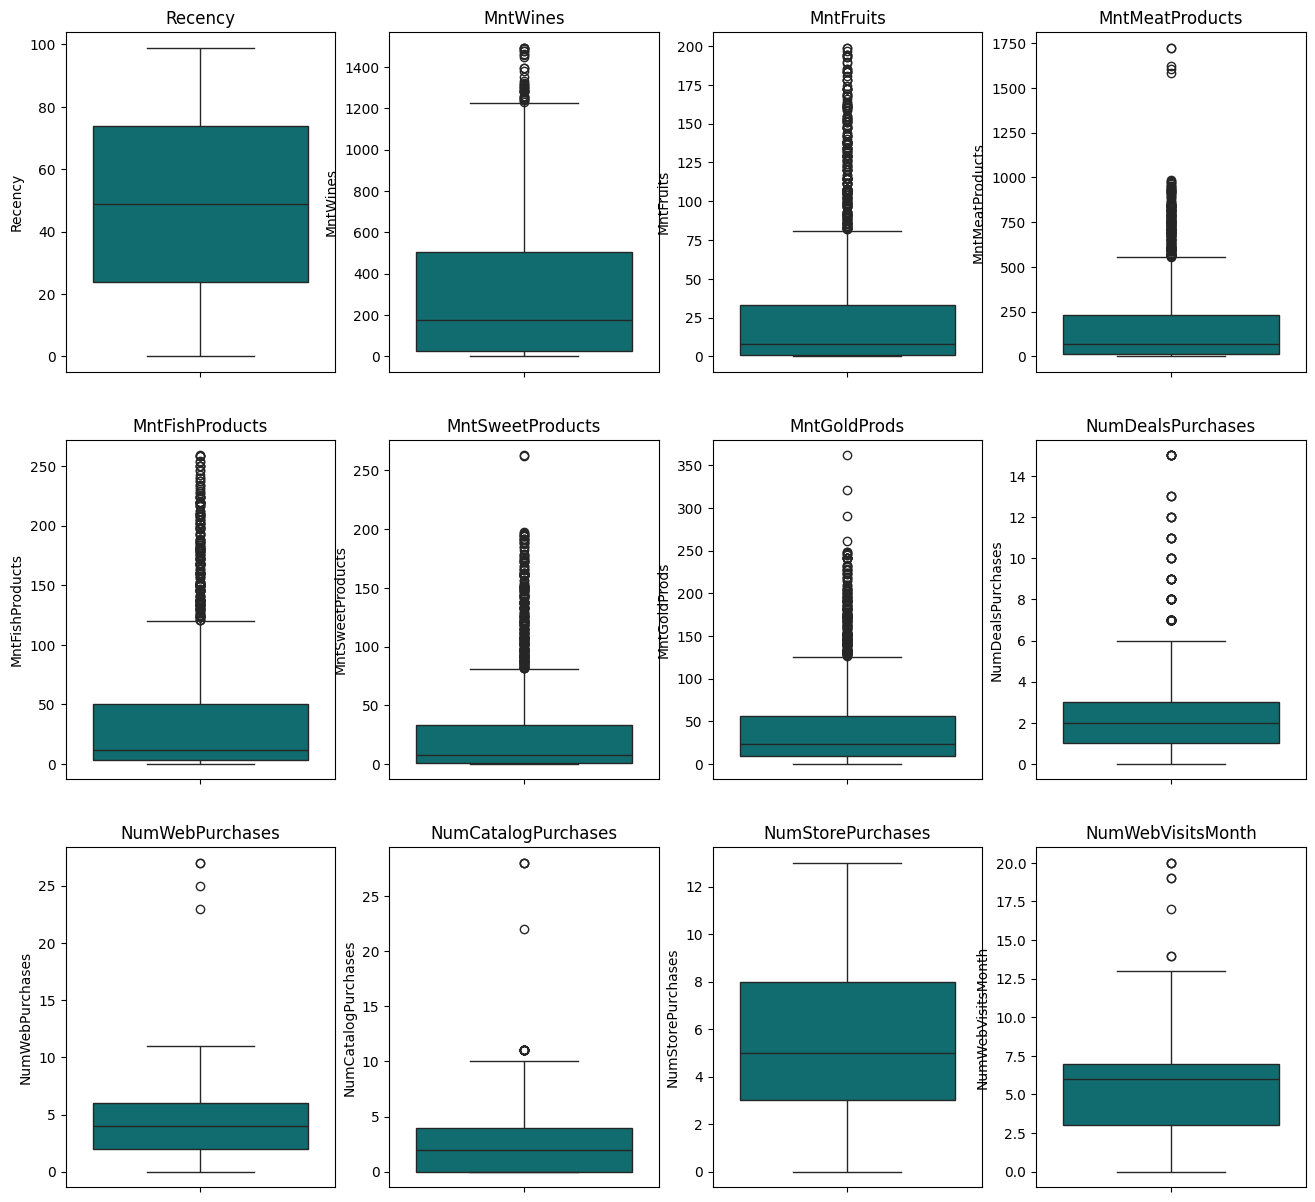

In [ ]:
# Data Visualization

list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(df[list_boxplots[cont]], ax=ax[i][j], color='#007B7F')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>There are columns that have some outliers, and others that have even more.</p>
<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Let's drop those samples that have more distant outliers</p>

In [ ]:
df.drop(df.index[df.MntMeatProducts > 1200], inplace=True)
df.drop(df.index[df.MntSweetProducts > 240], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

In [ ]:
df.shape

(2227, 22)

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Thirteen samples were dropped compared to the origianl dataset</strong></p>
<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>

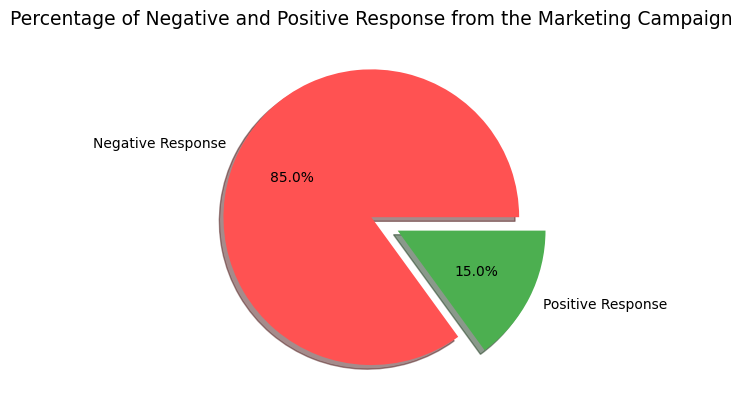

In [ ]:
# Data Visualization for Customer Insights

fig, ax = plt.subplots()

ax.pie(
    df.Response.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign', fontsize=13.5)

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>The  dataset has <strong style='color: green;'>Unbalanced classes</strong> with 15% of customers providing a positive response. Before building the model, we need to balance the data to avoid favoring the majority Negative Response class.</p>

In [ ]:
response_date = df.groupby('Dt_Customer')['Response'].mean().reset_index()
response_date['Dt_Customer'] = response_date.Dt_Customer.astype(str)

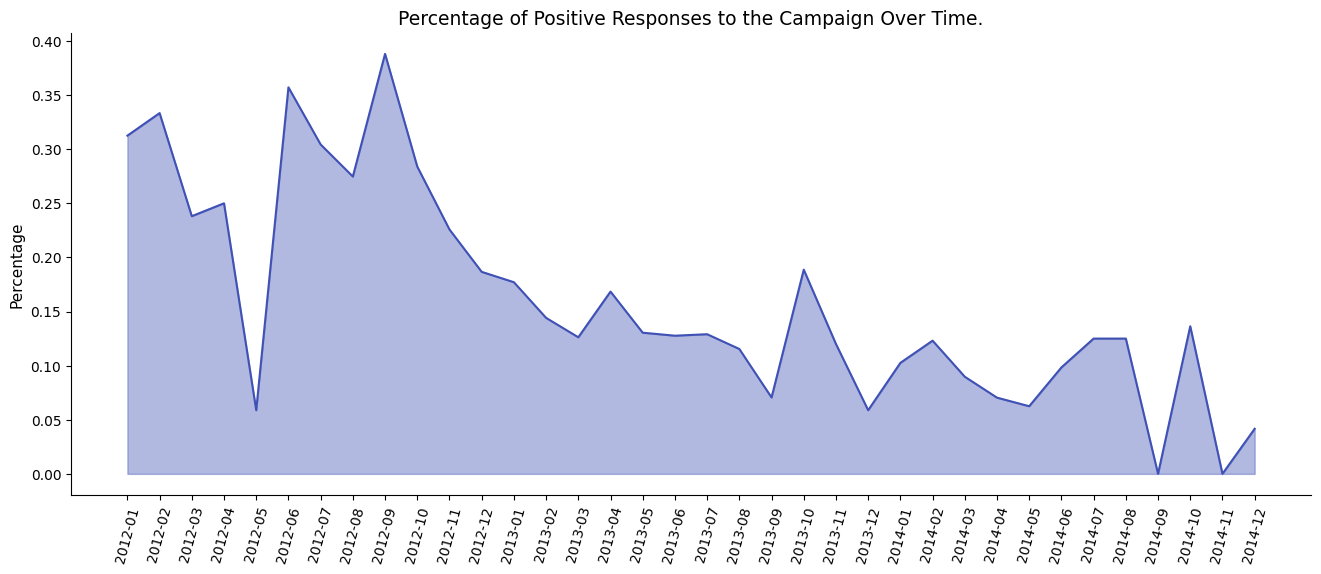

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.plot(response_date['Dt_Customer'], response_date['Response'], color='#3f51b5')
plt.fill_between(response_date['Dt_Customer'], response_date['Response'], color='#3f51b5', alpha=0.4)

ax.tick_params(axis='x', rotation=75)
ax.spines[['top', 'right']].set_visible(False)

ax.set_title('Percentage of Positive Responses to the Campaign Over Time.', fontsize=13.5)
ax.set_ylabel('Percentage', fontsize=11)

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Long-standing customers</strong> are more likely than new customers to provide a positive response to the campaign.</p>

<ipython-input-22-b6e42cb690e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])
<ipython-input-22-b6e42cb690e1>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative Response', 'Positive Response'])


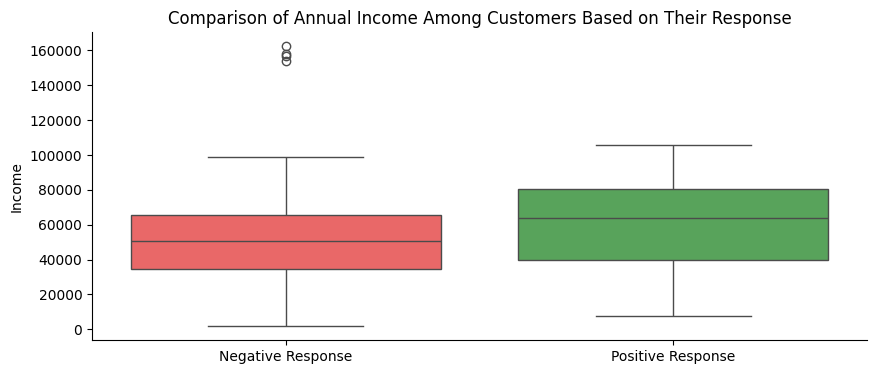

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])

ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Comparison of Annual Income Among Customers Based on Their Response', fontsize=12)

ax.set_xticklabels(['Negative Response', 'Positive Response'])
ax.set_xlabel('')

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Customers who provide a positive response, <strong style='color: green;'>have a higher annual income.</strong></p>

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

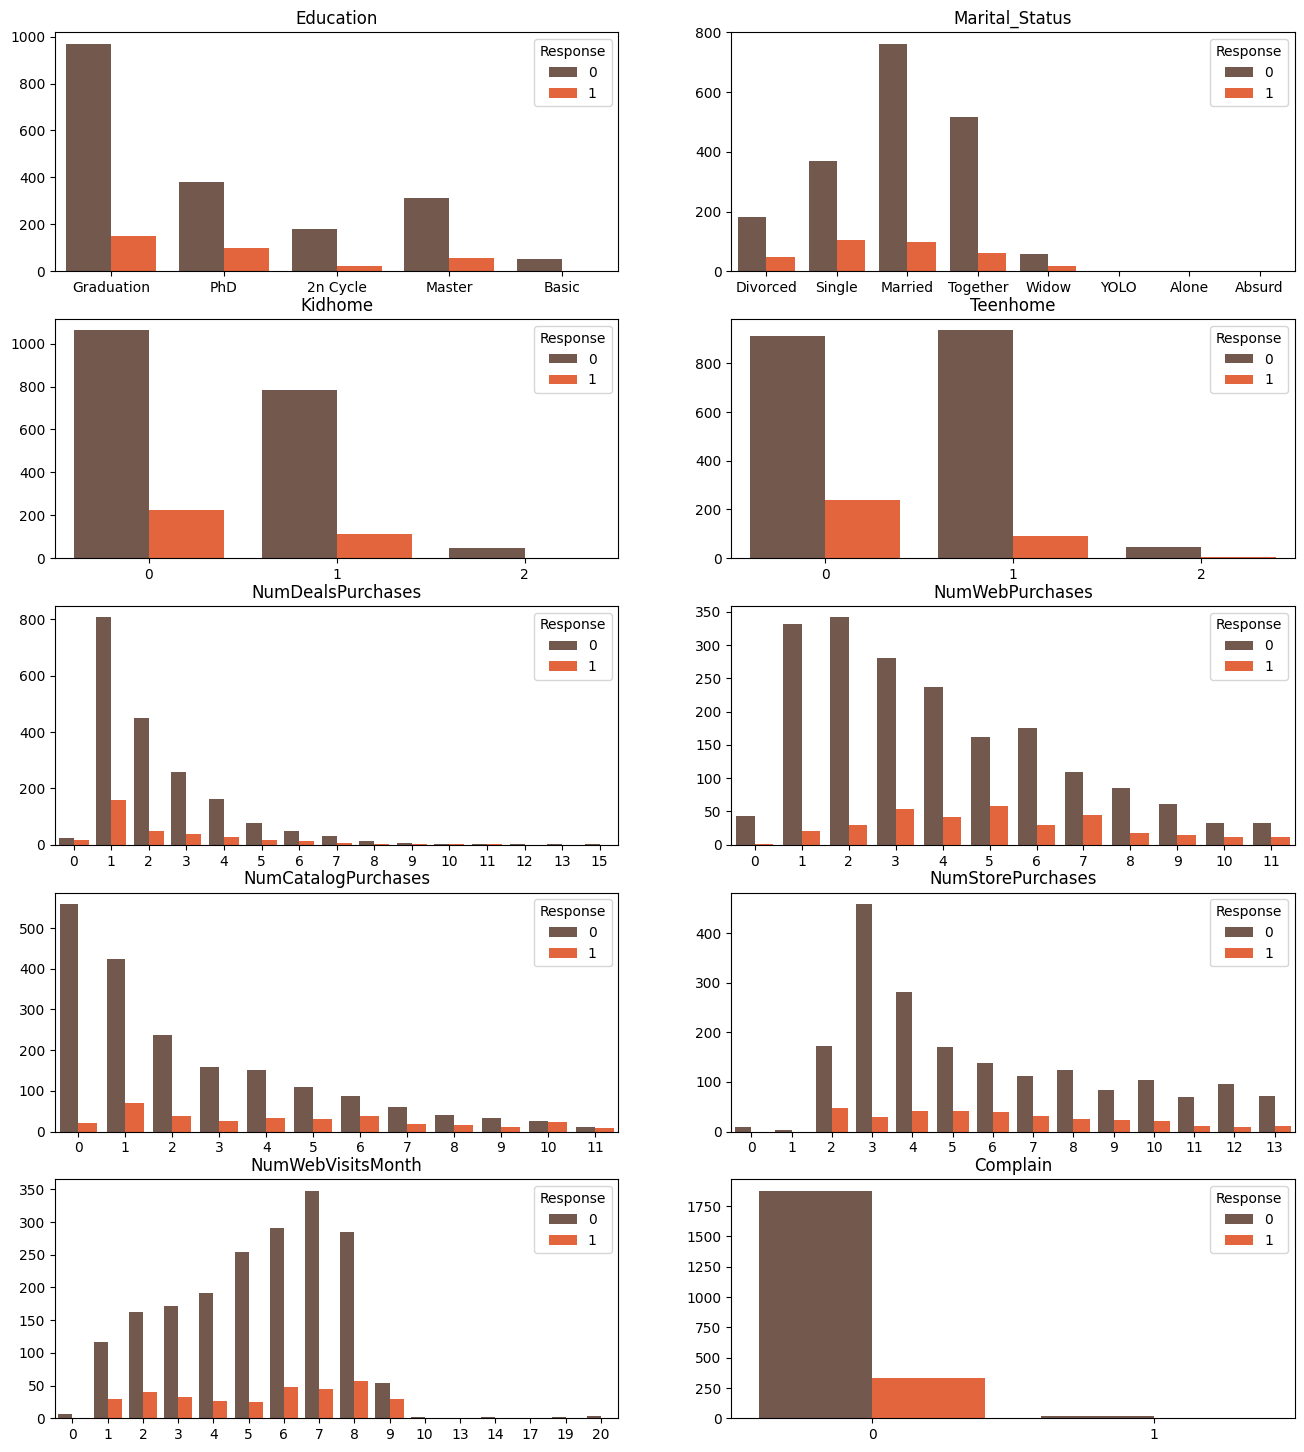

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))
custom_palette = ['#795548', '#ff5722']
cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette=custom_palette)

        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')

        cont = cont + 1

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Comparing the Response with the categorical variables...</strong></p>
<ul>
    <li>As number of purchases, both through the catalog and in store and on the web, increases, the percentage of customers responding positively to the campaign also increase.</li>
</ul>

In [ ]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

<ipython-input-27-f483f5ef9f03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
<ipython-input-27-f483f5ef9f03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
<ipython-input-27-f483f5ef9f03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
<ipython-input-27-f483f5ef9f03>:6: FutureWarning: 

Passing `palette` without assigning 

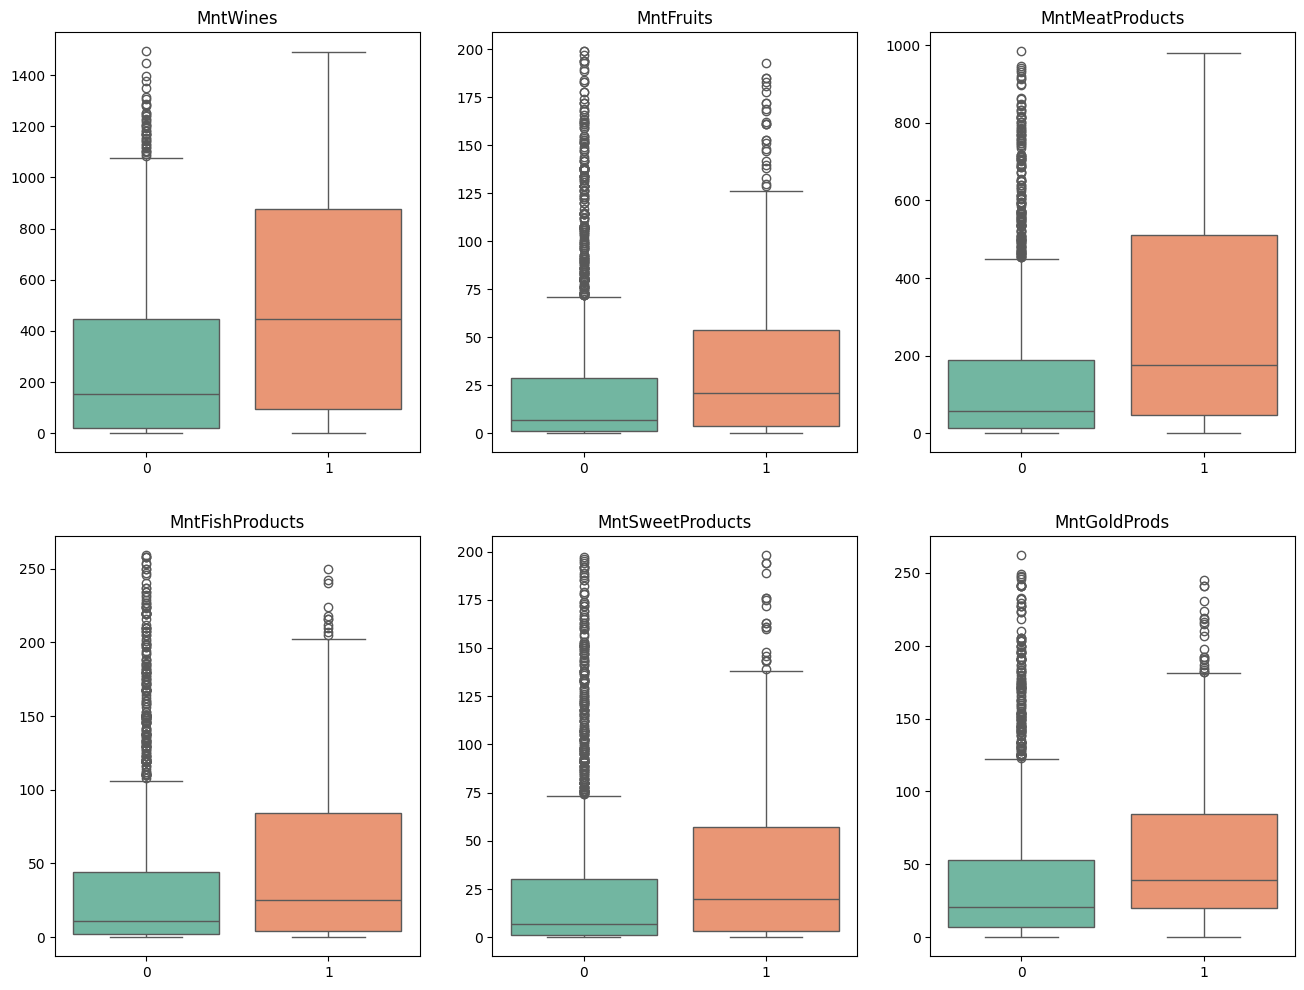

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

cont = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')

        ax[i][j].set_title(continuous_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')

        cont = cont + 1

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Comparing the Response with the continuous variables...</strong></p>

<ul>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>As customers purchase more of these products, the likelihood of their responding positively to the campaign increases.</p>
</ul>

In [ ]:
# Preprocessing

# Converting the date column into integer numbers.

sorted_dt = sorted([str(val) for val in df.Dt_Customer.unique()])

df['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_dt.index(str(val)))

In [ ]:
# dropping the 'Id' column

df.drop('Id', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df)

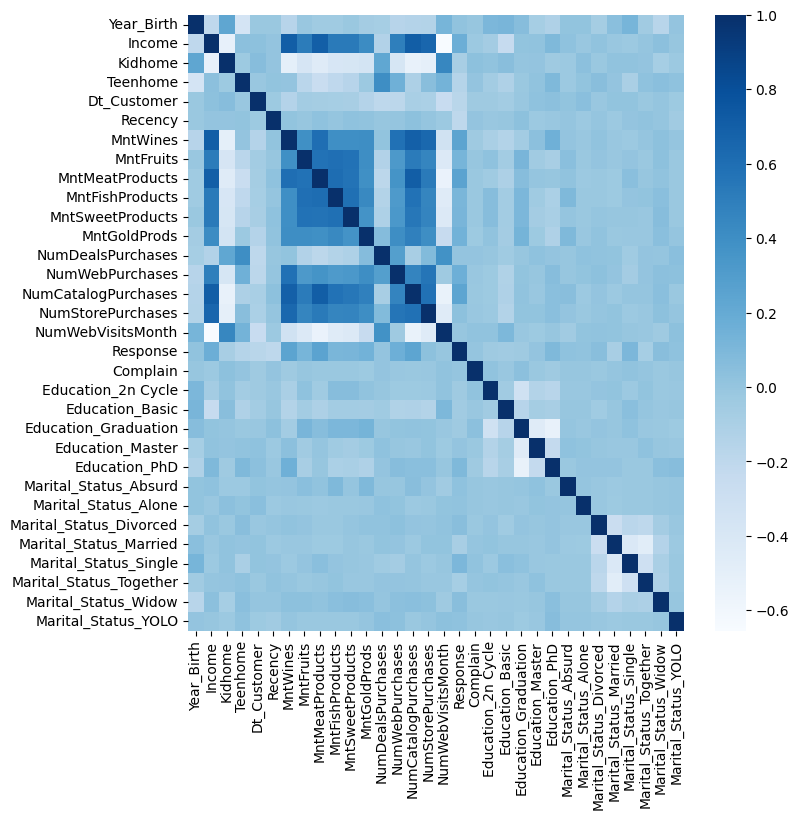

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=ax, cmap='Blues')
plt.show()

**Next Steps:**
*   Standardize the data
*   Balance the data
*   Split the data into training and testing sets

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Response', axis=1)
y = df.Response

X.shape, y.shape

((2227, 31), (2227,))

In [ ]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [ ]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


((3786, 31), (3786,))

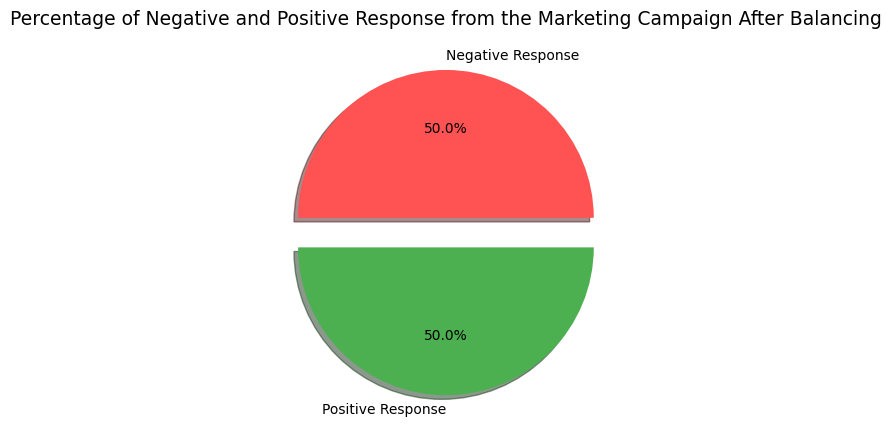

In [ ]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign After Balancing', fontsize=13.5)

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Now that or dataset is balanced, we can split the data into training and testing sets</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3028, 31), (758, 31), (3028,), (758,))

In [ ]:
y_train.value_counts()

,count
Response,
0,1514
1,1514


# **Modeling and Evaluation**
*   Decision Tree
*   Logistic Regression
*   K Nearest Neighbor
*   Random Forest





In [ ]:
# 7. Machine Learning and 8. Evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define models and parameters in a list of tuples
models = [
    (DecisionTreeClassifier(), {
        'criterion': ["gini", "entropy"],
        'splitter': ["best", "random"],
        'min_samples_split': [2, 3, 5]
    }),
    (LogisticRegression(max_iter=5000), {
        "penalty": ['l1', 'l2'],
        "C": [0.01, 0.1, 1, 10],
        "solver": ['saga', 'liblinear']
    }),
    (RandomForestClassifier(), {
        "n_estimators": [70, 90, 110],
        "criterion": ['gini', 'entropy'],
        'min_samples_split': [2, 3, 5]
    }),
    (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 10],
        "weights": ['uniform', 'distance']
    })
]

In [ ]:
# Initialize models_evaluation dataframe
models_evaluation = pd.DataFrame({
    'Model': [],
    'Precision': [],
    'Recall': [],
    'Accuracy': []
})

In [ ]:
# Function to add model evaluation to the dataframe
def concat_evaluations(df, y_pred, model):
    new_model = pd.DataFrame({
        'Model': [model],
        'Precision': [precision_score(y_pred=y_pred, y_true=y_test)],
        'Recall': [recall_score(y_pred=y_pred, y_true=y_test)],
        'Accuracy': [accuracy_score(y_pred=y_pred, y_true=y_test)]
    })
    return pd.concat([df, new_model], axis=0, ignore_index=True)

In [ ]:
# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Training DecisionTreeClassifier...
Best hyperparameters of DecisionTreeClassifier: 
DecisionTreeClassifier(criterion='entropy')


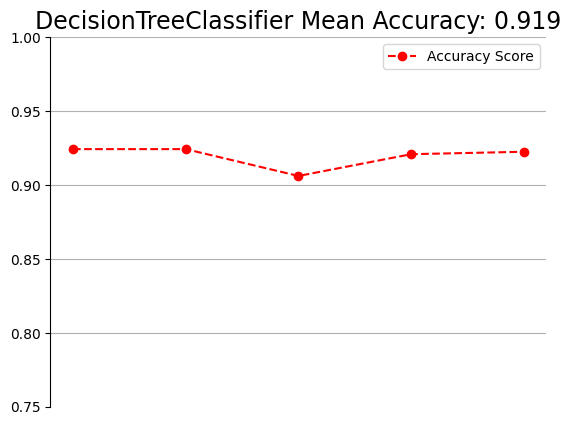

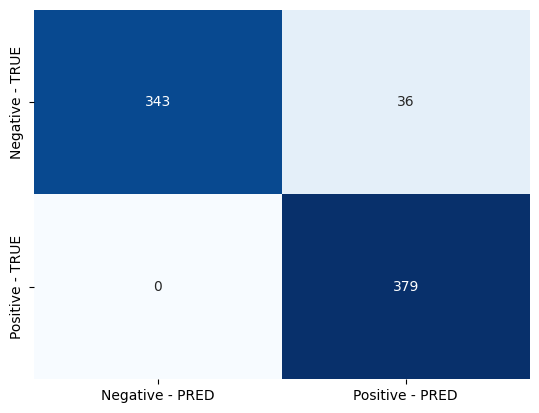

Training LogisticRegression...
Best hyperparameters of LogisticRegression: 
LogisticRegression(C=0.01, max_iter=5000, solver='liblinear')


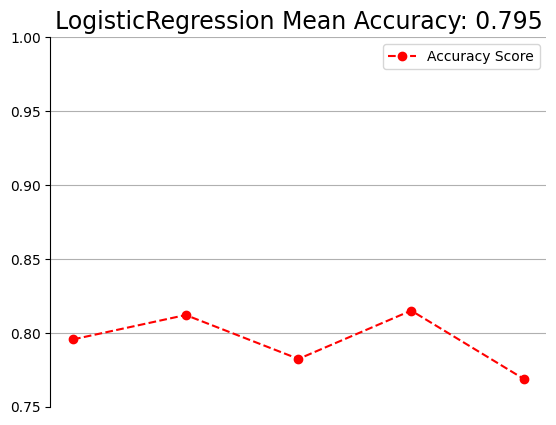

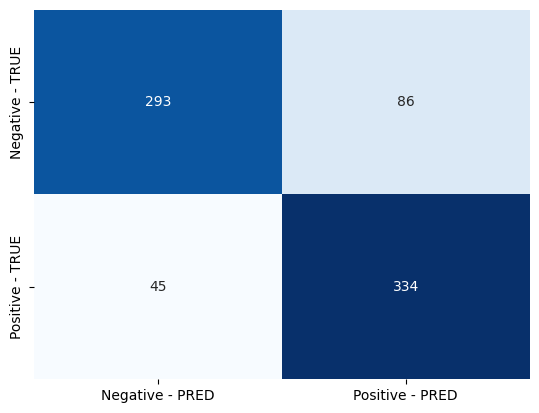

Training RandomForestClassifier...
Best hyperparameters of RandomForestClassifier: 
RandomForestClassifier(n_estimators=110)


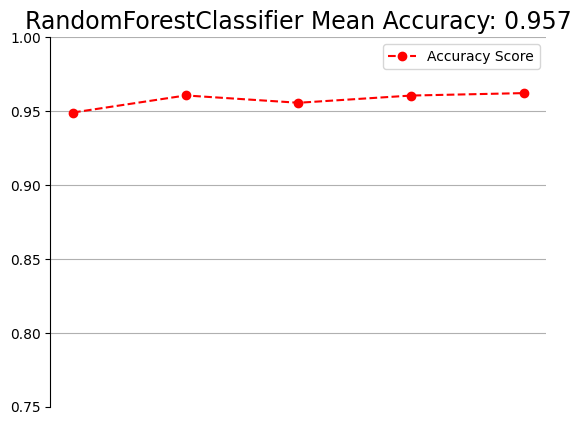

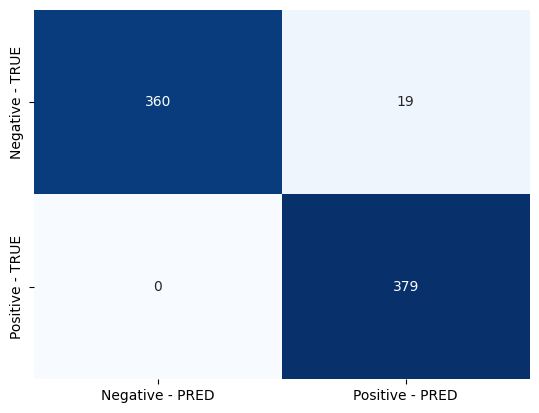

Training KNeighborsClassifier...
Best hyperparameters of KNeighborsClassifier: 
KNeighborsClassifier(n_neighbors=3, weights='distance')


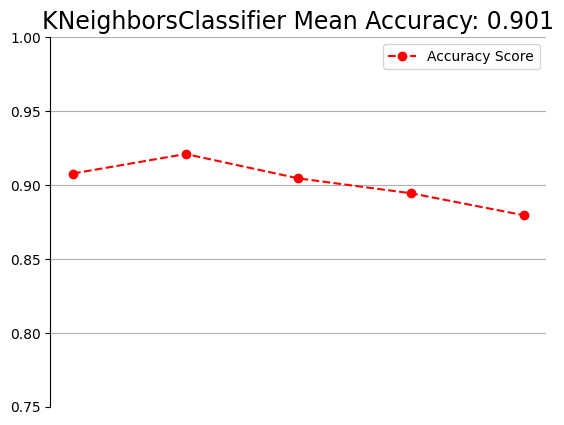

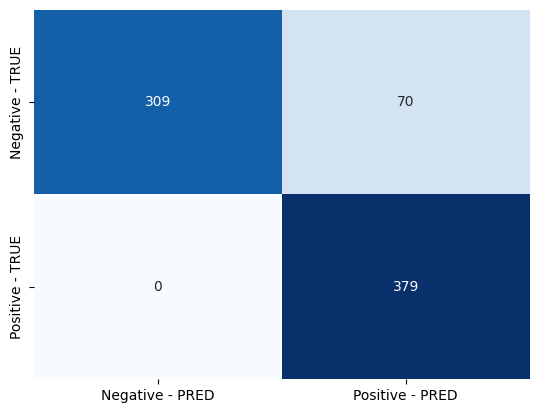

In [ ]:
# Iterate over the models
for model, params in models:
    print(f"Training {model.__class__.__name__}...")

    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=kf)
    grid_search.fit(X_train, y_train)

    print(f"Best hyperparameters of {model.__class__.__name__}: \n{grid_search.best_estimator_}")

    # Cross-validation score
    scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='accuracy')

    # Plotting the accuracy scores
    fig, ax = plt.subplots()
    ax.plot(scores, 'o--r', label='Accuracy Score')
    ax.set_title(f'{model.__class__.__name__} Mean Accuracy: {np.mean(scores):.3f}', fontsize=17)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_ylim(0.75, 1)
    ax.xaxis.set_visible(False)
    ax.legend()
    plt.grid()
    plt.show()

    # Predictions on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Confusion matrix plot
    cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
    fig, ax = plt.subplots()
    sns.heatmap(cm, ax=ax, cmap='Blues', annot=True, fmt='g', cbar=False,
                xticklabels=['Negative - PRED', 'Positive - PRED'],
                yticklabels=['Negative - TRUE', 'Positive - TRUE'])
    plt.show()

    # Add evaluation metrics to the dataframe
    models_evaluation = concat_evaluations(models_evaluation, y_pred, model.__class__.__name__)

In [ ]:
# Final evaluation summary
print(models_evaluation)

                    Model  Precision    Recall  Accuracy
0  DecisionTreeClassifier   0.889671  1.000000  0.937995
1      LogisticRegression   0.795238  0.881266  0.827177
2  RandomForestClassifier   0.954660  1.000000  0.976253
3    KNeighborsClassifier   0.844098  1.000000  0.907652


### **Conclusion:**

The **Random Forest Classifier** outperforms the other models with the highest **Accuracy (97.63%)**, **Precision (95.47%)**, and **Recall (100%)**. It demonstrates the best balance of high precision and perfect recall, making it the most reliable model for this classification task.

- **DecisionTreeClassifier** shows strong performance with a high **Accuracy (93.80%)** and perfect **Recall (100%)**, but its **Precision (88.97%)** is slightly lower compared to Random Forest.

- **KNeighborsClassifier** provides good **Accuracy (90.77%)** and **Recall (100%)**, but its **Precision (84.41%)** lags behind that of Random Forest and Decision Tree.
- **LogisticRegression** has the lowest performance across all metrics, with **Accuracy (82.72%)**, **Precision (79.52%)**, and **Recall (88.13%)**, making it less optimal for this task compared to the other models.

### **Final Recommendation:**
Based on these results, **RandomForestClassifier** is the best-performing model, providing the highest **Accuracy** and **Precision** while maintaining **Recall** at 100%. This model should be prioritized for deployment or further fine-tuning.

To effectively deploy the **Customer Insights for Marketing Campaigns** model in real-world scenarios, we need to follow these steps:

### 1. **Deployment of the Model**
   - **Cloud Platforms**: Deploy the trained model on cloud services like **AWS Sagemaker**, **Google Cloud AI**, or **Azure ML** for scalable performance.
   - **APIs**: Wrap the model in a **REST API** using frameworks like **Flask** or **FastAPI**, allowing the model to accept incoming customer data and return predictions.
   - **Real-Time Data Integration**: Integrate the API with your real-time data pipeline (e.g., **Kafka**, **AWS Kinesis**) to ensure the model receives fresh customer data for continuous predictions.

### 2. **Integration with Real-Time Data**
   - **Data Flow**: Stream customer data (e.g., demographics, behaviors, transactions) into a database or data warehouse in real-time.
   - **Preprocessing**: Apply the same preprocessing steps as during training, such as converting categorical variables and normalizing data, ensuring consistent feature formatting.
   - **Prediction Pipeline**: Feed preprocessed customer data into the deployed model to receive real-time predictions (e.g., likelihood of customer engagement or purchase).

### 3. **Drawing Predicted Visualizations**
   - **Data Storage and Analytics**:
     - Store model predictions in a centralized database.
     - Combine predictions with historical data for deeper insights into customer behavior trends.
   - **Dashboard Creation**:
     - Use visualization tools like **Tableau**, **Power BI**, or custom dashboards using **Python libraries** (e.g., **Dash**, **Plotly**, **Matplotlib**).
     - Visualization Ideas:
       - **Engagement Probability Heatmap**: Visualize customers with higher likelihoods of engaging with marketing campaigns.
       - **Segment Analysis**: Categorize customers by predicted engagement and tailor offers accordingly.
       - **Campaign Performance Trends**: Track campaign outcomes and adjust strategies in real time.
       - **Geographical Segmentation**: Map engagement predictions to regions for targeted local campaigns.
   - **Example Dashboard Metrics**:
     - **Engagement Rate**: Percentage of predicted engaged customers versus total customers.
     - **Segmentation Analysis**: Group customers into high, medium, and low engagement risk categories.
     - **Campaign ROI**: Measure the predicted impact of customer engagement on campaign success.

### 4. **Actionable Insights**
   - **Targeted Marketing Campaigns**: Focus on high-engagement probability customers by offering personalized recommendations or incentives.
   - **Proactive Retention Efforts**: Identify high-risk segments and deploy tailored offers or interventions to encourage purchase.
   - **Revenue Forecasting**: Estimate potential revenue from predicted customer behaviors to optimize campaign spending.

### 5. **Automating the Process**
   - **AutoML Frameworks**: Use **MLflow**, **Kubeflow**, or **TensorFlow Extended (TFX)** to automate model deployment and retraining.
   - **Scheduled Retraining**: Continuously update the model with new customer data to ensure predictions stay accurate as customer behavior evolves.

By following these steps, the  **Customer Insights for Marketing Campaigns** model will be fully integrated into  marketing systems, providing real-time actionable insights and enabling the organization to optimize campaigns based on ongoing data.